In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use("/Users/tjwilli/jupyter.mplstyle")
from IPython.display import Video

In [68]:
def lorentz(v0,B,tstop=10,dt=0.005):
    v0 = np.array(v0)
    B = np.array(B)
    t = np.arange(0,tstop,dt)
    v = np.zeros( (t.size,3) )
    r = np.zeros_like(v)
    v[0] = v0
    
    for i in range(1,t.size):
        v[i] = v[i-1] + np.cross(v[i-1],B) * dt
        r[i] = r[i-1] + v[i] * dt
    return v,r

In [69]:
v,r = lorentz([2,0,0],[0,0,-1],tstop=20)

Saved file to  lorentz_2.mp4


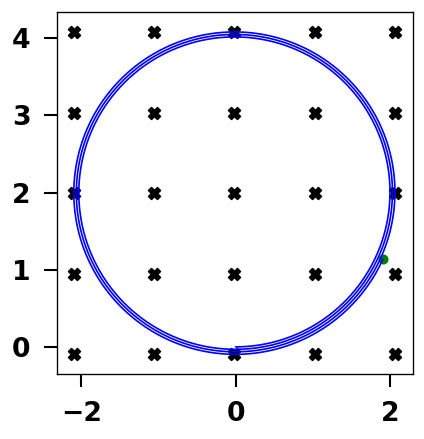

In [70]:
fname = "lorentz_2.mp4"

fig = plt.figure()
ax = plt.gca()

for x in np.linspace(r[:,0].min(),r[:,0].max(),5):
    for y in np.linspace(r[:,1].min(),r[:,1].max(),5):
        ax.scatter(x,y,marker='X',c='k',s=50)
        
path, = ax.plot([],[],c='blue',lw=1)
particle = ax.scatter([],[],c='green')
ax.set_aspect('equal')

def init():
    path.set_data( [],[] )
    particle.set_offsets( np.array( [[],[]]).T )
    return path,particle
def animate(i):
    path.set_data(r[:i,0],r[:i,1])
    particle.set_offsets(np.array( [[r[i,0]],[r[i,1]]] ).T)
    return path,particle

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=r[:,0].size, interval=2, blit=True)

anim.save(fname)
print("Saved file to ", fname)

In [51]:
r.min()

-2.0400540604452893

In [2]:
Video("lorentz_1.mp4")

In [73]:
Video("lorentz_2.mp4")